Kametay Turar - 2381203 - March 1, 2024 - Lab 3 - Linear Regression, PCA and LDA

In [26]:
import numpy as np
import matplotlib.pyplot as plt

**Task 3.1: Linear Regression with sklearn**

In [27]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

In [28]:
#load the data
x_value = np.load("/content/drive/MyDrive/Colab Notebooks/x_values-1.npy")
y_value = np.load("/content/drive/MyDrive/Colab Notebooks/y_values-1.npy")

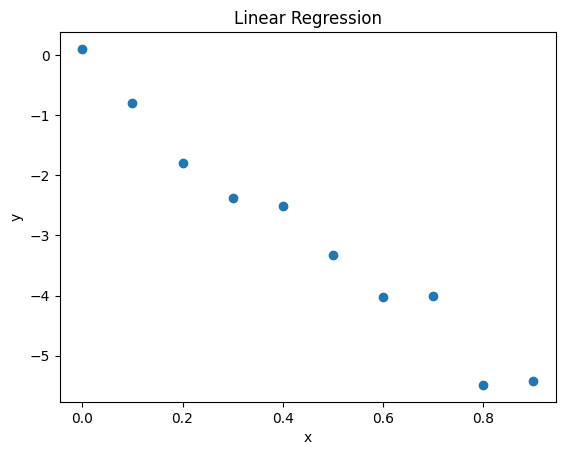

In [29]:
 # Create the scatter plot
plt.scatter(x_value, y_value)

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression")

# Display the plot
plt.show()

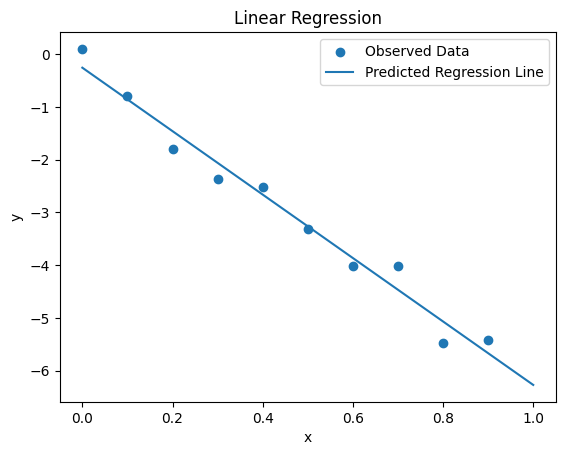

In [30]:
reg = LinearRegression().fit(x_value, y_value)
test_x_values=np.load("/content/drive/MyDrive/Colab Notebooks/test_x_values-1.npy")
y_value_predict = reg.predict(test_x_values)
plt.scatter(x_value, y_value, label="Observed Data")
plt.plot(test_x_values, y_value_predict, label="Predicted Regression Line")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Linear Regression")
plt.legend()
plt.show()

In [31]:
reg.predict(np.array([[0.48]]))

array([[-3.14442237]])

**Task 3.2: Principle Component Analysis with sklearn**

In [32]:
wineData = np.load("/content/drive/MyDrive/Colab Notebooks/wineData-1.npy")
wineLabels = np.load("/content/drive/MyDrive/Colab Notebooks/wineLabels-1.npy")

### Describe the dataset


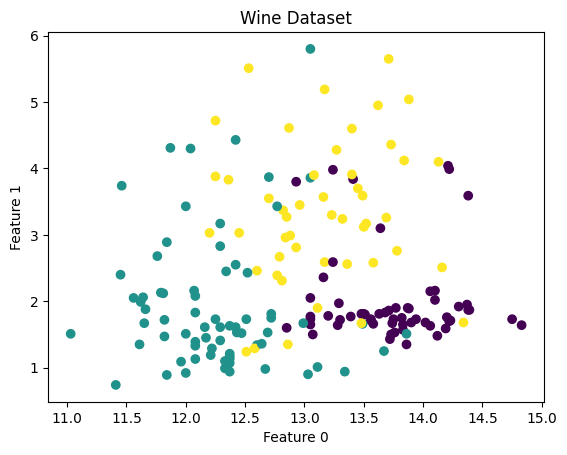

In [33]:
plt.scatter(wineData[:, 0], wineData[:, 1], c=wineLabels)

plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Wine Dataset')

# Display the plot
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
(wineData_train, wineData_test,
 wineLabels_train, wineLabels_test) = train_test_split(wineData, wineLabels, test_size=0.2)

In [35]:
print(wineData.shape)
print(wineData_train.shape)
print(wineData_test.shape)
print(wineLabels.shape)
print(wineLabels_train.shape)
print(wineLabels_test.shape)

(178, 13)
(142, 13)
(36, 13)
(178,)
(142,)
(36,)


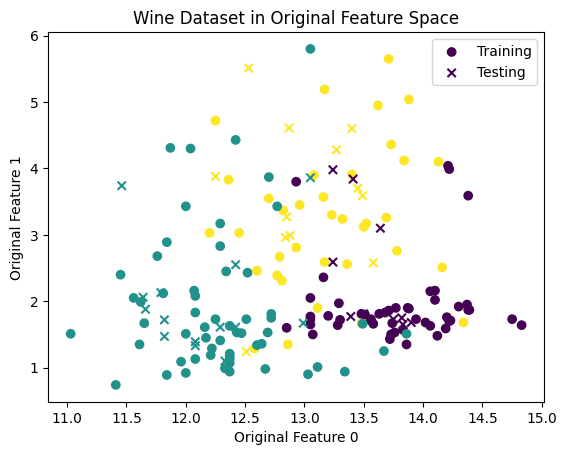

In [36]:
plt.scatter(wineData_train[:, 0], wineData_train[:, 1], c=wineLabels_train, label="Training")
plt.scatter(wineData_test[:, 0], wineData_test[:, 1], c=wineLabels_test, marker = 'x', label="Testing")

plt.xlabel('Original Feature 0')
plt.ylabel('Original Feature 1')
plt.title('Wine Dataset in Original Feature Space')

plt.legend()
plt.show()

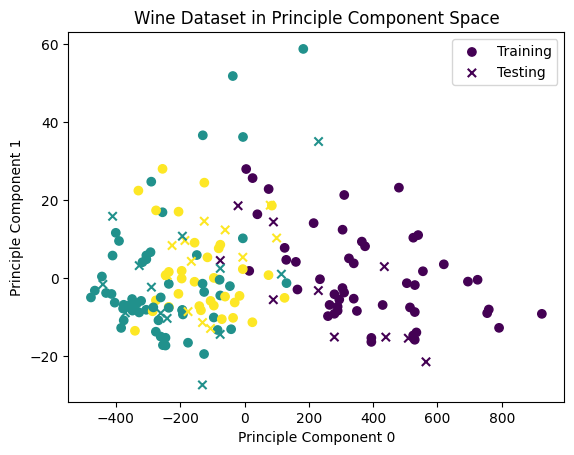

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(wineData_train)
reduced_data = pca.transform(wineData_train)
reduced_labels = pca.transform(wineData_test)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=wineLabels_train, label="Training")
plt.scatter(reduced_labels[:, 0], reduced_labels[:, 1], c=wineLabels_test, marker = 'x', label="Testing")

plt.xlabel('Principle Component 0')
plt.ylabel('Principle Component 1')
plt.title('Wine Dataset in Principle Component Space')

plt.legend()
plt.show()

**Task 3.3: Linear Discriminant Analysis with sklearn**

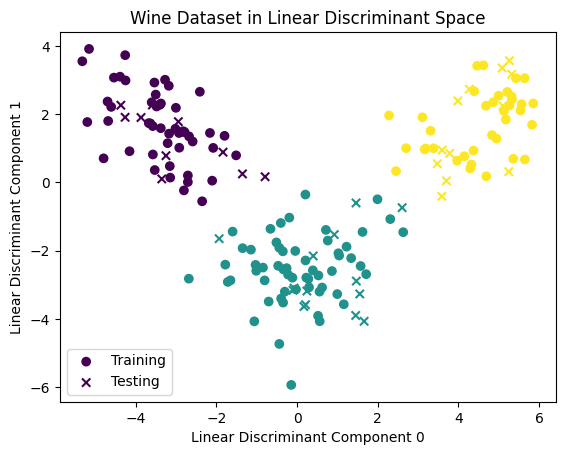

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis(n_components=2)
clf.fit(wineData_train, wineLabels_train)

lda_data = clf.transform(wineData_train)
lda_labels = clf.transform(wineData_test)

plt.scatter(lda_data[:, 0], lda_data[:, 1], c=wineLabels_train, label="Training")
plt.scatter(lda_labels[:, 0], lda_labels[:, 1], c=wineLabels_test, marker = 'x', label="Testing")

plt.xlabel('Linear Discriminant Component 0')
plt.ylabel('Linear Discriminant Component 1')
plt.title('Wine Dataset in Linear Discriminant Space')

plt.legend()
plt.show()

Describe the differences between PCA and LDA

Principal Component Analysis (PCA): PCA aims to find the directions (principal components) that maximize the variance in the dataset. It doesn't consider the class labels of the data. Essentially, it's an unsupervised method.

Linear Discriminant Analysis (LDA): LDA, on the other hand, aims to find a linear combination of features that characterizes or separates two or more classes of objects or events. It uses the class labels to find the directions ("discriminants") that will represent the axes that maximize the separation between multiple classes. Thus, LDA is supervised.

**Task 3.4: Principal Component analysis by hand**

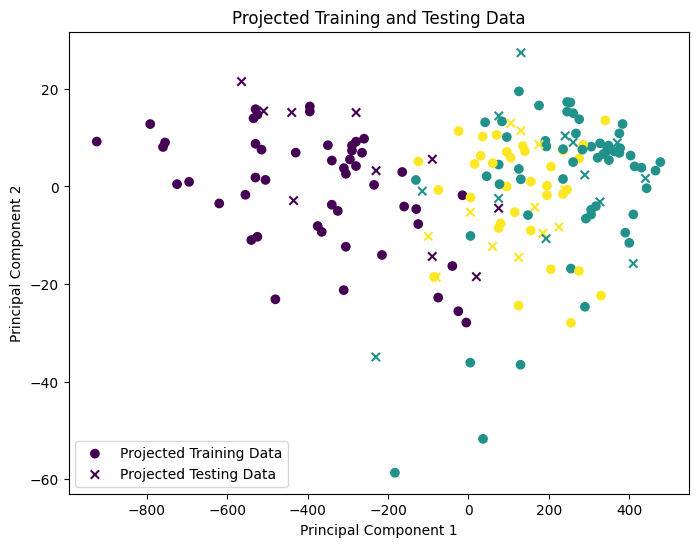

In [45]:
# Mean center the training data
mean_vector = np.mean(wineData_train, axis=0)
centered_wineData_train = wineData_train - mean_vector

# Calculate the Singular Value Decomposition (SVD) of the mean-centered training data
u, s, vh = np.linalg.svd(centered_wineData_train)

# Projecting the training data into a 2-dimensional Principal Component space
num_components = 2
projection_matrix = vh[:num_components]  # Select the first 'num_components' significant eigenvectors
projected_wineData_train = centered_wineData_train @ np.transpose(projection_matrix)


# Mean-center the testing data using the mean vector from the training data
centered_wineData_test = wineData_test - mean_vector

# Project the testing data using the same projection matrix from the training data
projected_wineData_test = centered_wineData_test @ np.transpose(projection_matrix)

# Visualize the projected training and testing data
plt.figure(figsize=(8, 6))
plt.scatter(projected_wineData_train[:, 0], projected_wineData_train[:, 1], c=wineLabels_train, marker='o', label='Projected Training Data')
plt.scatter(projected_wineData_test[:, 0], projected_wineData_test[:, 1], c=wineLabels_test, marker='x', label='Projected Testing Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.title('Projected Training and Testing Data')
plt.show()

*Why do we need to transpose?*

The vh matrix obtained from Singular Value Decomposition (SVD) encapsulates the right singular vectors, effectively serving as the eigenbasis associated with the data's covariance structure. When implementing PCA, these singular vectors are crucial as they define the directions onto which the data is projected. Nonetheless, the SVD output positions these vectors as rows within vh. To align them for the subsequent matrix multiplication that achieves the projection, it's essential to transpose vh, converting its rows into columns. This transposition ensures that the data can be properly transformed onto the new axes defined by the principal components.

*How do we know dimensionality has been reduced?*

Dimensionality reduction is a process where a limited number of eigenvectors (principal components) are chosen based on their importance. In the code context where num_components = 2, this specifies the selection of the first two eigenvectors from vh. By mapping the data onto these vectors, we effectively compress the data into a two-dimensional space, no matter the number of initial features

*Why mean-centre the test data?*

Mean-centering the test data with the training data's mean is vital to ensure that the test data is aligned with the principal component space defined by the training data. This alignment is part of the PCA process, where the transformation learned from the training set must be consistently applied to any subsequent data. By using the training data's mean, the test data is adjusted to the same reference point, enabling it to be accurately represented in the principal component space established during training. Such uniformity is necessary for the model to effectively interpret and evaluate the test data

*Why the same projection?*

Employing the same projection matrix for the test data is a critical step to maintain the integrity of the PCA transformation across different datasets. The projection matrix, formulated from the training data through SVD, sets the foundation for the principal component space where the training data resides. To compare and predict effectively, the test data needs to be transposed into this same space.

**Task 3.5: Apply your skill**

In [40]:
taskdata = np.load("/content/drive/MyDrive/Colab Notebooks/task3_5_data.npy")
tasklabels = np.load("/content/drive/MyDrive/Colab Notebooks/task3_5_labels.npy")

In [41]:
print(taskdata)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
print(tasklabels)

[5 0 4 ... 5 6 8]


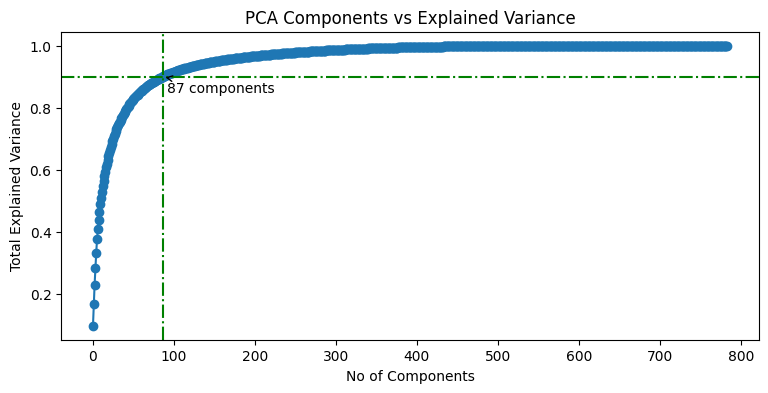

Minimum number of components to retain at least 90% of variance: 87


In [43]:
pca = PCA()

pca.fit(taskdata)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 90% of the variance
# Add 1 since arrays are 0-indexed
min_components = np.where(cumulative_variance >= 0.90)[0][0] + 1

# Now let's plot the cumulative explained variance to visualize where it crosses 90%
plt.figure(figsize=(9, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('No of Components')
plt.ylabel('Total Explained Variance')
plt.title('PCA Components vs Explained Variance')

# Draw a line at 90% to mark the threshold
plt.axhline(y=0.90, color='green', linestyle='-.', label='90% Variance')
plt.axvline(x=min_components-1, color='green', linestyle='-.')

# Annotate the point where we cross 90% variance
plt.annotate(f'{min_components} components',
             xy=(min_components-1, 0.90),
             xytext=(min_components+5, 0.85),
             arrowprops=dict(facecolor='black', arrowstyle = "->"))

# Display the plot
plt.show()

print(f"Minimum number of components to retain at least 90% of variance: {min_components}")